In [1]:
!pip3 install finterstellar

In [2]:
import finterstellar as fs

In [3]:
OTP = "16684897351011151161"

In [4]:
df = fs.fn_single(otp = OTP, symbol='COST', window="T")
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2022-04-30,2.175380e+11,1.905570e+11,2.698100e+10,1.941000e+10,7.571000e+09,5.646000e+09,12.73,9.531000e+09,7.571000e+09,444000000.0,...,1.149400e+10,4.333900e+10,1.996800e+10,2.202000e+09,7.826000e+09,-2.872000e+09,-3.583000e+09,-698000000.0,-3.062000e+09,531.72
2022-05-31,2.074590e+11,1.821790e+11,2.528000e+10,1.819300e+10,7.087000e+09,5.329000e+09,12.01,8.926000e+09,7.087000e+09,443700000.0,...,1.149400e+10,4.333900e+10,2.051300e+10,1.984000e+09,6.113000e+09,-2.632000e+09,-3.463000e+09,-351000000.0,-3.019000e+09,466.22
2022-08-31,2.291870e+11,2.017850e+11,2.740200e+10,1.951100e+10,7.891000e+09,5.873000e+09,13.23,1.002900e+10,7.891000e+09,443839000.0,...,1.152100e+10,4.351900e+10,2.064200e+10,2.211000e+09,5.361000e+09,-1.577000e+09,-4.880000e+09,700000000.0,-3.278000e+09,522.10


In [5]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

# PER
- EPS, PRICE 사용
- PER = Price / EPS
- 주가 배수 = 재무지표와 가격이 결합된 지표

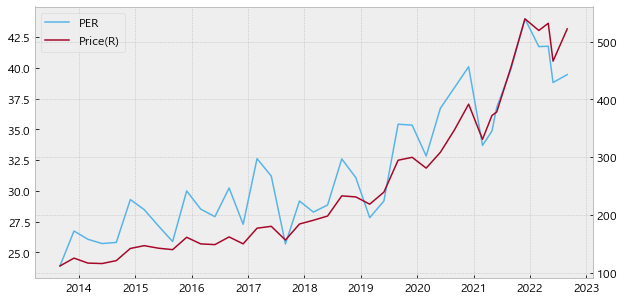

In [6]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

# 밴드 차트
- draw_price_multiple_band()


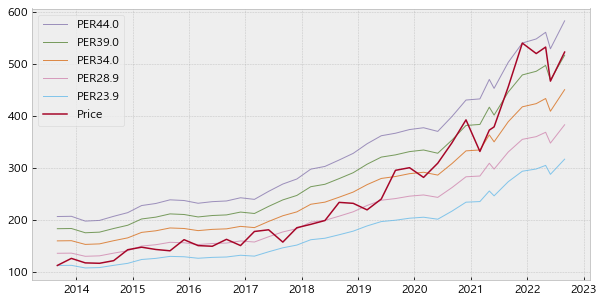

In [7]:
# multiple : 프라이스 멀티플 이름
# acct : 계산에 필요한 컬럼
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

# PER 낮을 수록 이익 대비 저평가된 종목 (가치주)

In [8]:
terms = fs.set_terms(trade_start='2010Q1', trade_end='2021Q1')
terms

Index(['2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
       '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [9]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

2013-08-31    23.903846
2013-11-30    26.744136
2014-02-28    26.071429
2014-05-31    25.725055
2014-08-31    25.816631
2014-11-30    29.303093
2015-02-28    28.480620
2015-05-31    27.160000
2015-08-31    25.887246
2015-11-30    30.003717
2016-02-29    28.522814
2016-05-31    27.911820
2016-08-31    30.240672
2016-11-30    27.292727
2017-02-28    32.629834
2017-05-31    31.216263
2017-08-31    25.695082
2017-11-30    29.181962
2018-02-28    28.281481
2018-05-31    28.855895
2018-08-31    32.605594
2018-11-30    31.086022
2019-02-28    27.829517
2019-05-31    29.181486
2019-08-31    35.427885
2019-11-30    35.354953
2020-02-29    32.843458
2020-05-31    36.722619
2020-08-31    38.415470
2020-11-30    40.099284
2021-02-28    33.706721
2021-04-30    34.872540
2021-05-31    36.796693
2021-08-31    39.885289
2021-11-30    43.995106
2022-02-28    41.740354
2022-04-30    41.769049
2022-05-31    38.819317
2022-08-31    39.463341
Name: PER, dtype: float64

In [10]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=OTP, term=t)

2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK


KeyboardInterrupt: 

In [ ]:
print(data['2009Q4'])

In [ ]:
for t in terms :
    data[t]['PER'] = data[t]['Price']/data[t]['EPS']

In [ ]:
data[t]['PER']

In [ ]:
s = {}
signal = {}

for t in terms:
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10,n=30, asc=True)
    signal[t] = list(s[t].index)

In [ ]:
s

In [ ]:
signal

In [ ]:
s = {}
signal = {}

for t in terms:
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
    print(signal[t])

In [ ]:
df = fs.backtest(signal=signal, data=data, m=2, cost =.001)

In [ ]:
df

In [ ]:
fs.draw_return(df)

# PBR

In [4]:
df =fs.fn_single(otp =OTP , symbol = 'JBLU' ,window = 'T')

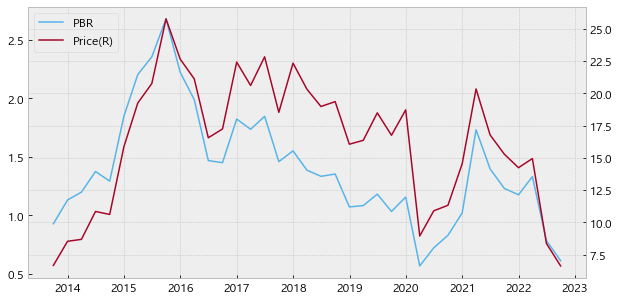

In [6]:
df['BPS'] = df['Shareholders Equity']/df['Shares']
df['PBR'] = df['Price'] /df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

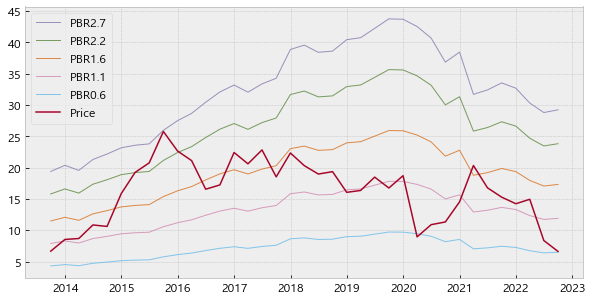

In [8]:
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS')

In [10]:
terms = fs.set_terms(trade_start ='2020Q1', trade_end ='2021Q1')
data={}
for t in terms:
    data[t] = fs.fn_consolidated(otp = OTP, term=t)

s={}
signal={}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity']/data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] /data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc= True)
    signal[t] = list(s[t].index)
    
df = fs.backtest(signal=signal, data=data,m=2, cost=.001)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 233.65%
Accumulated return: 233.65%
Investment period: 1.0yrs
Sharpe ratio: 4.15
MDD: 0.00%


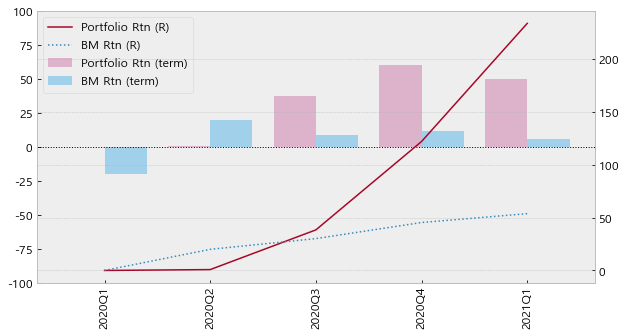

In [11]:
fs.draw_return(df)

In [14]:
df = fs.backtest(signal=signal, data=data,m=3, cost=.001)

CAGR: 358.76%
Accumulated return: 358.76%
Investment period: 1.0yrs
Sharpe ratio: 4.88
MDD: 0.00%


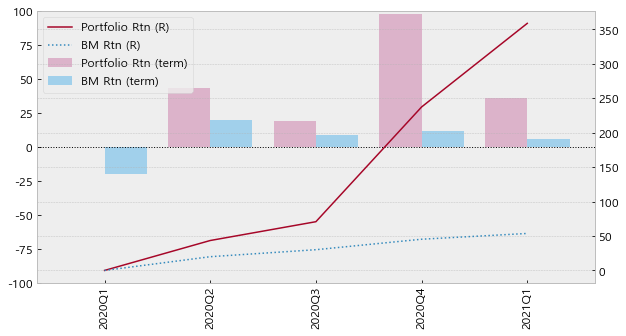

In [15]:
fs.draw_return(df)